In [33]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import pickle

신경망은 퍼셉트론의 단점을 보완
 1. 퍼셉트론은 가중치 설정을 사람이 해줘야함
 2. 신경망은 가중치 파라미터의 적절 값을 데이터로부터 자동으로 학습

![Alt text](../../../../../C:/Users/Administrator/AIFFEL/Aiffel_study/images.jpg)

맨 왼쪽 줄 = 입력층
맨 오른쪽 줄 = 출력층
중간 줄 = 은닉층

- 은닉층의 뉴런은 사람 눈에는 보이지 않음
- 참고로 위의 신경망은 층이 3개지만 가중치를 갖는 층은 2개기 때문에 2층신경망 이라고 불림

이걸 식으로 나타낸다면?
y = h(b + w1x1 + w2x2)

$$f(n)=
\begin{cases}
0\quad(x\,≤\,0) \\
1\quad(x\,>\,0)
\end{cases}$$

즉 input의 총합이 h(x)라는 함수를 거쳐 변환
- 이 값이 0을 넘으면 1 반환 아니면 0 반환
- 즉 위 그림과 아래 두식은 같음

## 활성화 함수

그렇다면 저 h(x)는 무엇인가?
- 입력신호의 총합을 출력 신호로 변환하는 함수
- 즉 **활성화 함수**

만약 위의 식을 다시쓴다면 2개의 식으로 나눌 수 있음
- a = b + w1x2 + w2x2 #가중치가 달린 입력신호와 편향의 총합 계산 - a
- y = h(a) #그 a를 함수 h()에 넣어 y를 출력하는 것

![Alt text](https://velog.velcdn.com/images/joo4438/post/a2d53cc7-446e-419e-a740-b407d26f617b/image.png)

즉 가중치 신호를 조합한 결과는 a
활성화 함수 h()를 통과하여 y(노드)로 변화되는 과정이 나와있음
(여기서는 뉴런 = 노드)

위 그림과 같은 함수는 임계값을 경계로 출력이 바뀜
- 이를 계단 함수라 함(step function)  
    - 때문에 퍼셉트론에선 활성화 함수로 계단 함수를 이용한다 라고 할 수 있음  
    - 만약 계단 함수 말고 딴걸 쓰면? - 이게 Perceptron to Nerual network의 키


## 시그모이드 함수

활성화 함수의 일종  

식은 다음과 같음

$h(x) = \frac{1}{1 + exp(-x)}$
- 여기서 exp(-x)는 $e^{-x}$를 뜻함  
    - e는 자연상수로 2.7182...의 값을 갖는 실수

신경망에선 활성화 함수로 시그모이드 함수를 이용해서 시놓를 변환 후 다음 뉴런에 전달


In [ ]:
# 계단함수 그리기
# input이 1넘으면 1, 아니면 0

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
    
# 이때 인수는 실수(부동소수점)만 받아들임
# numpy array 배열은 못받기 때문에 다음과 같이 수정가능

def step_function(x):
    y = x > 0
    return y.astype(np.int)

원래는 numpy array는 부등호 연산 수행시 bool값이 return되지만
astype() method 사용해 int로 반환시 0, 1로 반환 가능

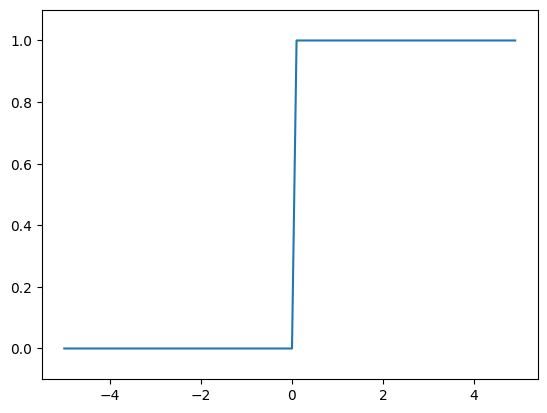

In [6]:
#계단함수의 그래프
def step_function(x):
    return np.array(x > 0, dtype=np.int32) # numpy 업뎃 이후 32비트 정수 명시해줘야함

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위지정
plt.show()

In [11]:
# 시그모이드 함수 구현
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

#test
x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

#test with broadcast
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[0.26894142 0.73105858 0.88079708]
[2. 3. 4.]
[1.         0.5        0.33333333]


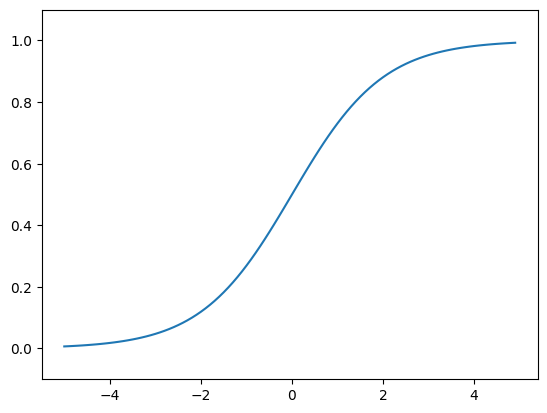

In [14]:
#시그모이드 function 그래프화
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 계단함수와 시그모이드의 차이

계단함수는 0 or 1로 return되기 때문에 계단처럼 각진모양
sigmoid는 0.xxx 같이 실수로 return 시켜서 매끈한 모양
- **즉 신경망에서는 연속적인 실수가 흐른다**

## 비선형 함수

게단 함수와 시그모이드 둘다 비선형 함수

선형 함수? - input 들어갔을때 입력이 상수배
- 즉, 직선 1개로 그릴 수 있는 함수
- 얘로 활성화 함수쓰면 layer를 쌓는 의미가 없음  
    - 얘는 뭘해도 y(x) = ax같은 식이 되어버림

비선형 함수? - 직선 하나로 못그림(곡선, 계단 등의 모양)

## ReLU(Rectified Linear Unit) 함수
최근에 제일 많이쓰는 활성화 함수
- 입력이 0 이하이면 0 return
- 0 이상이면 그대로 출력
![Alt text](https://vidyasheela.com/web-contents/img/post_img/40/ReLU-activation-function-new.png)

수식으로 표현하면?
$$f(n)=
\begin{cases}
x\quad(x\,>\,0) \\
0\quad(x\,≤\,0)
\end{cases}$$





In [15]:
#ReLU
def relu(x):
    return np.maximum(0, x)

### 다차원 배열
- 배열 자체가 숫자의 집합  
    - 결국 N차원으로 수를 나열하는 모든걸 다차원 배열이라고 함

In [17]:
#1차원 배열
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A)) #차원수 확인
print(A.shape) #배열의 형상 - 1차원에서 원소 4개로 구성되있다는 뜻 (튜플로 반환)
print(A.shape[0]) #A.shape[n]은 A 배열 또는 행렬의 n 번째 차원의 크기를 나타내는 코드

[1 2 3 4]
1
(4,)
4


In [19]:
#2차원 배열
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape) #(x, y)로 반환 x는 열, y가 행

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 행렬의 곱셈

![Alt text](https://i.imgur.com/Oi7Tf5o.png)

다만 다른 형상의 행렬끼리 곱할때는 0번째 차원이 행이 두번째 1번째 차원의 열과 같아야함 

In [20]:
#행렬 곱셈
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [22]:
#형상이 다른 행렬 곱셈
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
print(np.dot(A, B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


### 신경망에서의 행렬 곱

![Alt text](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-12.53.07-PM.png)

In [23]:
#신경망 행렬 곱
X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


In [27]:
def identity_function(x):
    return x

def init_network(): #W, b 초기화
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x): #순전파
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### 항등 함수, softmax 함수
항등함수는 입력과 출력이 항상 같다는것
- 그래서 항등함수에선 입력신호 = 출력신호

##### 소프트맥스 함수의 식
$$y_k = \frac{exp(a_k)}{\sum_{i=1}^K exp(a_i)}$$

exp(x)는 $e^x$를 뜻하는 지수함수(e는 자연상수)
n은 출력층의 뉴런 수
$y_k$는 그중 k번째 출력을 말함

이 소프트맥스 출력층의 각 뉴런은 모든 입력신호에서 영향을 받음

In [30]:
#softmax function 구현

a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) #지수함수
print(exp_a)

sum_exp_a = np.sum(exp_a) #지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [31]:
# 위 논리 흐름을 함수로 구현한다면 다음과 같음
def softmax(a):
    exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 소프트맥스 함수 구현 주의점

위에서 구현한 softmax의 문제는 오버플로 문제
- 지수함수는 쉽게 큰값을 뱉음  
    - 때문에 큰값끼리 나눗셈을 하면 수치가 불안정 해짐

이를 위해 수식 개선 필요  
$$y_k = \frac{\exp(a_k)}{\sum_{i=1}^n \exp(a_i)} = \frac{C\,\exp(a_k)}{C\sum_{i=1}^n \exp(a_i)} = \frac{\exp(a_k\,+\,logC)}{\sum_{i=1}^n \exp(a_i\,+\,logC)} = \frac{\exp(a_k\,+\,C^`)}{\sum_{i=1}^n \exp(a_i\,+\,C^`)}$$

전개 과정은 다음과 같음  
1. 첫번쨰 변형에서는 임의의 정수를 분자, 분모 양쪽에 곱함
2. 다음 C를 지수함수 exp()안으로 옮겨 logC로 변환
3. logC를 C`라는 새로운 기호로 바꿈

즉, softmax의 지수 함수를 계산할 때 어떤  정수를 더하거나 빼도 결과는 바뀌지 않음
- 보통은 오버플로를 막을 목적으로 C`에 입력신호중 최댓값을 넣음

softmax 사용하면 모든 출력이 0~1 사이이기 때문에 출력 총합이 1이되고 함수의 출력을 확률로 해석가능

참고로 신경망으로 분류시 출력층의 softmax함수는 보통 생략
- 지수 함수 계산에 드는 자원낭비를 막기 위함
- 즉 학습한 후에 추론 단계에서 출력층의 softmax를 생략

In [ ]:
#softmax 함수 구현
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) #오버플로 방지
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 순전파를 이용한 손글씨 숫자 인식

손글씨 숫자분류(MNIST) 예제를 이용해 이미 학습된 파라미터 사용해 학습과정을 생략하고 추론과정만 구현 할 것
- 이러한 추론과정을 신경망의 순전파라고 함(forward propagation)

In [44]:
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from data.dataset.mnist import load_mnist
from data.common.functions import sigmoid, softmax

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
                                                  normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


이제 MNIST 데이터로 추론 수행 신경망 구현
- 입력층 뉴런 784개 - 이미지 크기가 28 x 28 = 784
- 출력층 뉴런 10개 - 이 문제가 0~9까지 숫자를 구분하는 문제(클래스의 수)

아래 함수들은 순서대로 작업 처리해줌
이후 정확도 평가
- normalize=True 옵션은 각 픽셀의 값을 0.0 ~ 1.0 으로 변환 (그냥 픽셀의 값을 255로 나눈 것)

In [46]:
def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("data/sample_weight.pkl", 'rb') as f:
        # 학습된 가중치 매개변수가 담긴 파일(딕셔너리 변수)
        # 학습 없이 바로 추론
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

# 정확도 평가
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352



딥러닝에서 배치(batch)는 한 번에 처리하는 데이터의 양을 의미
배치 처리(batch processing) - 전체 데이터를 일부로 나누어(batch) 그룹 단위로 처리하는 방식 
즉, 입력 데이터를 배치(batch) 단위로 나누어서 연산을 수행 후 이를 모아서 한 번에 가중치 갱신을 하는 방식이 배치 처리

배치 처리를 수행할 때는 한 번에 처리하는 데이터의 양을 지정 (batch size)
- 이 batch size는 하이퍼파라미터
    - 작은 batch size는 메모리 사용량이 적고 모델 학습이 불안정할 수도 있음
        - 각 batch에서 gradient를 계산할 때 사용되는 데이터가 적어져서 gradient의 편차가 커지는 경향
        - 전체 데이터에 대한 대표성을 상대적으로 잃을 수도 있음
    - 큰 batch size는 메모리 사용량이 많아질 수 있으며, 일반적으로 더 안정적인 학습이 가능

이렇게 배치처리를 수행하면 부하도 줄이고 수치계산 라이브러리 대부분이 큰 배열을 효율적으로 처리 가능하게 최적화 되어있기 때문에 이점 발생
- 컴퓨터에선 큰 배열을 한번에 계산하는게 분할된 작은 배열을 여러 번 계산하는거보다 빠름

In [49]:
#배치 처리 구현
batch_size = 100

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:3.7408


배운내용 정리
- 신경망에서는 활성화 함수로 sigmoid, ReLU같은 비선형 함수를 이용
- numpy의 multidimensional array사용시 신경망 효율적 구현 가능
- ML문제는 크게 회귀와 분류로 나눌 수 있음
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 softmax를 사용
- 분류에선 출력층의 뉴런 갯수를 분류하려는 클래스의 수와 같게 설정
- 입력 데이터를 묶은 것을 batch라 하며 추론 단계 처리를 이 batch 단위로 진행시 결과를 훨신 더 빠르게 얻을 수 있음